# Mini-challenge 2
## Preliminary Work
The `loyalty_data.xlsx` sheet shows preliminary work done before Python analysis. This sheet was used to analyze the data on a wider scale, finding which businesses and reward members might be suspicious based on total spending. These suspicions can then be further investigated with this Python worksheet.

In [1]:
import pandas as pd
import re


# merge purchase data
cc_data = pd.read_csv("cc_data.csv",encoding='ansi')
loyalty_data = pd.read_csv("loyalty_data.csv",encoding='ansi')
loyalty_data = loyalty_data.drop('timestamp',axis=1)
merged = pd.merge(left=cc_data, right=loyalty_data, how='left', on=['location', 'price'])
merged = merged.astype({'timestamp': 'string'})
days = []
times = []
t = []
splitter = re.compile(r"(\d\d/\d\d/\d\d\d\d) (\d\d:\d\d)")
for e in merged['timestamp']:
    mt = splitter.match(e);
    days.append(mt.group(1))
    times.append(mt.group(2))
    # numerical time
    h = int(mt.group(2)[0:2])
    m = int(mt.group(2)[3:])
    t.append(3600*h + 60*m)
purchases = merged.drop('timestamp', axis=1)
purchases.insert(0, "t", t, True)
purchases.insert(0, "time", times, True)
purchases.insert(0, "date", days, True)

# merge car data
# = pd.read_csv('car-assignments.csv', encoding='ansi')
#car_assignments = car_assignments.astype({'CarID': 'string'})
gps = pd.read_csv('gps.csv', encoding='ansi')
t = []
days = []
times = []
for e in gps['Timestamp']:
    # split date & time
    mt = splitter.match(e);
    days.append(mt.group(1))
    times.append(e[11:])
    # numerical time
    h = int(e[11:13])
    m = int(e[14:16])
    s = int(e[17:19])
    t.append(3600*h + 60*m + s)
    
gps = gps.drop('Timestamp', axis=1)
gps.insert(0, "t", t, True)
gps.insert(0, "time", times, True)
gps.insert(0, "date", days, True)
print(purchases.head())
print(gps.head())

         date   time      t             location  price  last4ccnum loyaltynum
0  01/06/2014  07:28  26880  Brew've Been Served  11.34        4795      L8566
1  01/06/2014  07:34  27240     Hallowed Grounds  52.22        7108        NaN
2  01/06/2014  07:35  27300  Brew've Been Served   8.33        6816      L8148
3  01/06/2014  07:36  27360     Hallowed Grounds  16.72        9617      L6267
4  01/06/2014  07:36  27360     Hallowed Grounds  16.72        9617      L5553
         date      time      t  id        lat       long
0  01/06/2014  06:28:01  23281  35  36.076225  24.874689
1  01/06/2014  06:28:01  23281  35  36.076220  24.874596
2  01/06/2014  06:28:03  23283  35  36.076211  24.874443
3  01/06/2014  06:28:05  23285  35  36.076217  24.874253
4  01/06/2014  06:28:06  23286  35  36.076214  24.874167


# Combining Data
The purchase and loyalty data can be easily combined to pair a loyalty number with credit card digits, as well as give more accurate timestamps for each loyalty card's use. The GPS and car access sheets can also be combined with the car ID as a common field. For convenience sake, the existing timestamps of all data was split into date and time, and the GPS data was parsed into an integer representing minutes from midnight. 

<IPython.core.display.Javascript object>


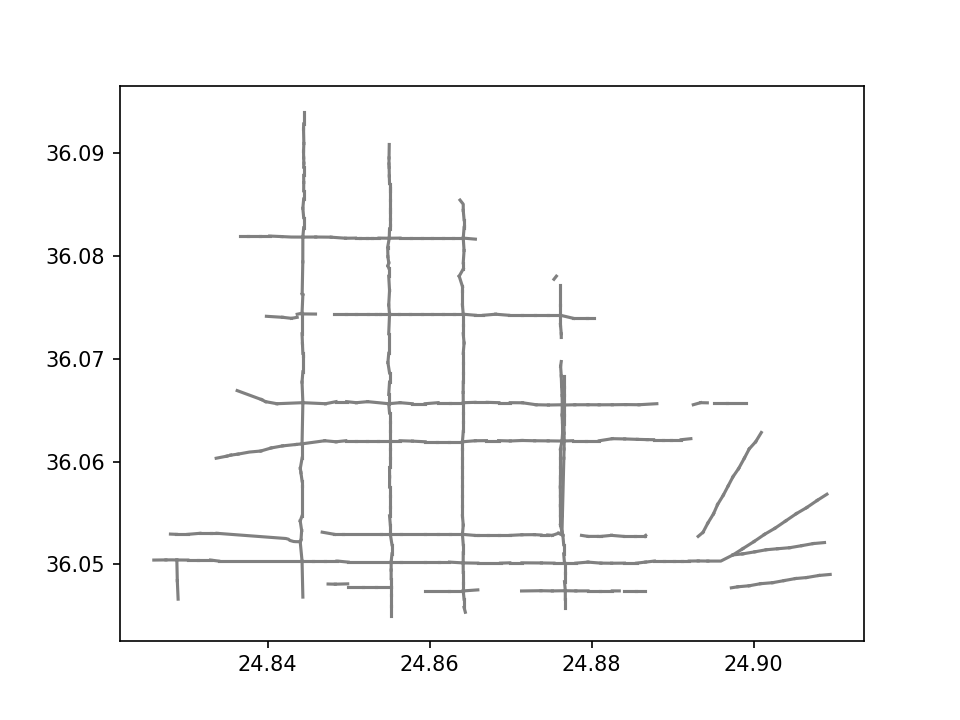

In [2]:
from pykml import parser
from lxml import etree
import matplotlib.pyplot as plt

%matplotlib notebook

# process geospatial data
with open('Geospatial/Abila.kml') as f:
    doc = parser.parse(f)
splitter = re.compile(r"(\d\d\.\d+,\d\d\.\d+)")
csplit = re.compile(r"(\d\d\.\d+),(\d\d\.\d+)")
pdat = []
accepted_names = ['Carnero', 'Parla', 'Pilau', 'Spetson', 'Taxiarchon', 'Barwyn', 'Arkadiou', 'Androutsou', 'Ermou', 'Egeou', 'Ipsilantou', 'Velestinou']
for e in doc.iter():
    if e.tag == '{http://www.opengis.net/kml/2.2}Placemark':
        for an in accepted_names:
            if str(e.name.text).find(an) != -1:
                pairs = splitter.findall(e.LineString.coordinates.text)
                row = {'lng': [], 'lat': []}
                for p in pairs:
                    m = csplit.match(p);
                    row['lng'].append(float(m.group(1)))
                    row['lat'].append(float(m.group(2)))
                pdat.append(row)
fig = plt.figure(1)
ax = plt.axes()
for l in pdat:
    ax.plot(l['lng'], l['lat'], 'grey', linewidth=1.5);
    
business_coords = {
    "Bean There Done That": (24.8505, 36.08336),
    "Abila Scrapyard": (24.8468, 36.07427),
    "Albert's Fine Clothing": (24.8560, 36.07483),
    "Coffee Shack": (24.8590, 36.07515),
    "Frank's Fuels": (24.8375, 36.07393),
    "Kronos Mart": (24.8479, 36.06684),
    "U-Pump": (24.8692, 36.06698),
    "Jack's Magical Beans": (24.8749, 36.06766),
    "Maximum Iron and Steel": (24.8371, 36.06358),
    "Roberts and Sons": (24.8531, 36.06368),
    "Hallowed Grounds": (24.8857, 36.06397),
    "General Grocer": (24.8579, 36.06115),
    "Gelatogalore": (24.8625, 36.06095),
    "Carlyle Chemical Inc.": (24.8821, 36.06086),
    "Nationwide Refinery": (24.8844, 36.05721),
    "Coffee Cameleon": (24.8899, 36.05673),
    "Guy's Gyros": (24.8975, 36.05570),
    "Katerina's Café": (24.8973, 36.05259),
    "Brew've Been Served": (24.9012, 36.05493),
    "Frydos Autosupply n' More": (24.9057, 36.05624),
    "Chostus Hotel": (24.8970, 36.07233),
    "Ahaggo Museum": (24.8781, 36.07612),
    "Ouzeri Elian": (24.8723, 36.05162),
    "Abila Airport": (24.8238, 36.05007),
    "fallback": (24.9023, 36.08790)
}

# Determining the shop's locations
I had a lot of trouble installing anything that could read the provided ESRI shapefiles, but I could get PyKML working. So I used PyKML to plot the street addresses, filtering unneccessary streets so as to match the tourist guide included in the challenge package. Using this plot, I estimated the position of each business and created a dictionary to store those coordinates for the next section. Unfortunately, the locations of several businesses were not displayed on the map. For these, I had to place their purchases over the ocean as a throwaway option, so these businesses can't be analyzed with the current system.

<IPython.core.display.Javascript object>


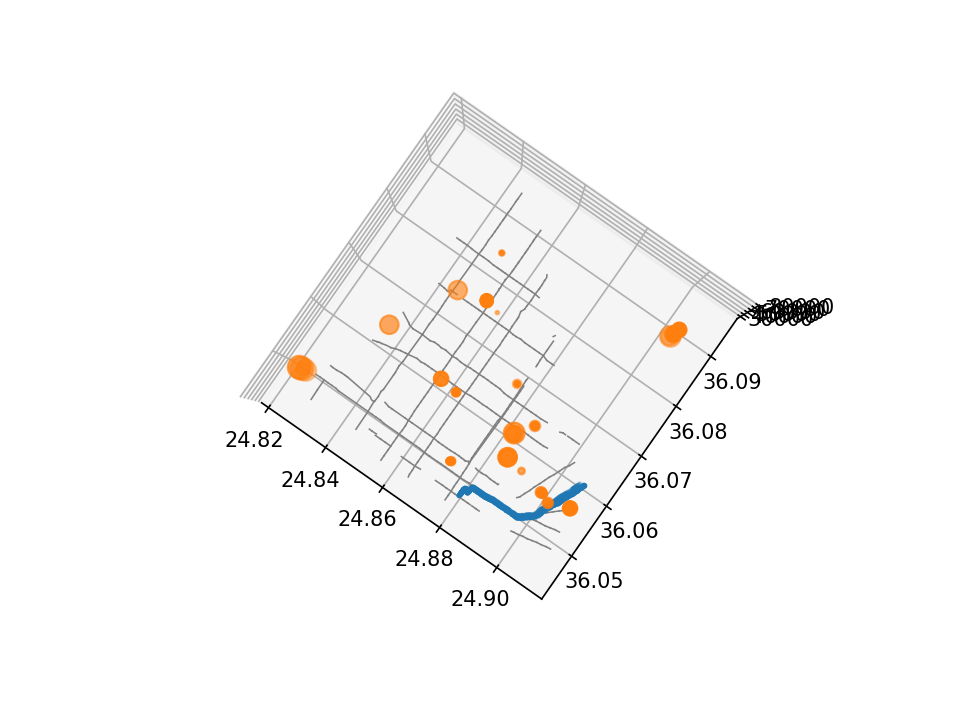

In [4]:
from math import frexp
%matplotlib notebook

# VARS
focus = 16
day = '01/09/2014'
                          
# processing data
g = gps[gps['id'] == focus]
g = g[g['date'] == day]

fig = plt.figure(2)
ax = plt.axes(projection='3d')
ax.scatter3D(g['long'], g['lat'], g['t'], s=1.5**2);

# plot purchase data
p = {'lat': [], 'lng': [], 't': [], 's': []}
for i,e in purchases[purchases['date'] == day].iterrows():
    try:
        temp = business_coords[e['location']]
    except KeyError:
        temp = business_coords['fallback']
    p['lat'].append(temp[1])
    p['lng'].append(temp[0])
    p['t'].append(float(e['t']))
    (mant, exp) = frexp(e['price'])
    p['s'].append(0.2*exp**2.5)
ax.scatter3D(p['lng'], p['lat'], p['t'], 'yellow', s=p['s'])

# roads
for l in pdat:
    ax.plot3D(l['lng'], l['lat'], 24000, 'grey', linewidth=0.75);


# Tracking Cars
To visualize and analyze suspicious activity, a 3D plot can be used to track GPS data over time. The `focus` and `day` variables can be changed to select a specific car ID and date. Relative to position on the x/y axis and time on the z axis, the GPS data is displayed on a plot. Alongside this data is the roadmap from above, and the day's purchases in yellow. A larger dot represents a larger purchase. Using this plot, one can connect purchases to GPS data to find who was where when big purchases took place. By investigating this data, it should be possible to produce enough evidence to identify suspicious behavior and determine who might be worthy of further investigation.

# Conclusion
This challenge was significantly more difficult than 03, but seemed more approachable than 01. I ran into a few technical challenges partway into my work, and was able to get around them, albiet imperfectly. Suspicious data can be analyzed and some connections can be formed between vehicles and purchases/loyalty IDs. However these conclusions are shaky and I couldn't get coordinates for every business.

# Report Questions
1. Using just the credit and loyalty card data, identify the most popular locations, and when they are popular. What anomalies do you see? What corrections would you recommend to correct these anomalies? Please limit your answer to 8 images and 300 words.

Was not able to complete.

2. Add the vehicle data to your analysis of the credit and loyalty card data. How does your assessment of the anomalies in question 1 change based on this new data? What discrepancies between vehicle, credit, and loyalty card data do you find? Please limit your answer to 8 images and 500 words.

Was not able to complete.

3. Can you infer the owners of each credit card and loyalty card? What is your evidence? Where are there uncertainties in your method? Where are there uncertainties in the data? Please limit your answer to 8 images and 500 words.

Was not able to complete. Method depends on human analysis of the 3D chart.

4. Given the data sources provided, identify potential informal or unofficial relationships among GASTech personnel. Provide evidence for these relationships. Please limit your response to 8 images and 500 words.

Was not able to complete.

5. Do you see evidence of suspicious activity? Identify 1- 10 locations where you believe the suspicious activity is occurring, and why    Please limit your response to 10 images and 500 words.

Yes. From the excel sheet, we can see that two buyers (L8477 & L4063) are each spending thousands of dollars at Kronos Pipe and Irrigation and Maximum Iron and Steel. Abila Scrapyard also recieved $9500 from one buyer (L3317), who was the only person to spend money there. L9633 spent $23,000 at Stewart and Sons Fabrication, where other buyers only spent a few thousand. Similarly, L5756 spent $28,000 at Carlyle Chemical Inc.

6. If you solved this mini-challenge in 2014, how did you approach it differently this year?
n/a